In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv("labeled_news_dataset.csv")
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()
df['clean_text'] = df['Lemmatized'].fillna('').str.lower()

# Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Label'])

# Vectorize using enhanced TF-IDF
vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train = vectorizer.fit_transform(train_df['clean_text']).toarray()
X_test = vectorizer.transform(test_df['clean_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Label'])
y_test = label_encoder.transform(test_df['Label'])

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Class weights for imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define a deeper neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    class_weight=class_weights_dict
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3481 - loss: 1.4304 - val_accuracy: 0.4375 - val_loss: 1.3680
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4266 - loss: 1.3130 - val_accuracy: 0.3750 - val_loss: 1.3534
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5194 - loss: 1.3058 - val_accuracy: 0.4375 - val_loss: 1.3450
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5544 - loss: 1.4150 - val_accuracy: 0.5000 - val_loss: 1.3326
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5891 - loss: 1.2504 - val_accuracy: 0.4375 - val_loss: 1.3120
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5616 - loss: 1.1802 - val_accuracy: 0.4375 - val_loss: 1.2838
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6582 - loss: 1.1578 - val_accuracy: 0.4375 - val_loss: 1.2528
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6326 - loss: 1.0629 - val_accuracy: 0.5000 - val_loss: 1.2133
Epoch 9/30
9/9 ━━

In [ ]:
#topic classification
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and clean data
df = pd.read_csv("labeled_news_dataset.csv")
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()
df['text'] = df['text'].apply(lambda x: re.sub(r"[^a-z\s]", "", x))  # Remove non-alpha

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')
X_train = vectorizer.fit_transform(train_df['text']).toarray()
X_test = vectorizer.transform(test_df['text']).toarray()

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df['Label'])
y_test = le.transform(test_df['Label'])

# Convert to one-hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(enumerate(class_weights))

# Build neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=20, batch_size=16, validation_split=0.1, class_weight=cw_dict)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Neural Network Test Accuracy: {accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4151 - loss: 1.2784 - val_accuracy: 0.5000 - val_loss: 1.3526
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4627 - loss: 1.3928 - val_accuracy: 0.5000 - val_loss: 1.3414
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6442 - loss: 1.2277 - val_accuracy: 0.5625 - val_loss: 1.3078
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8220 - loss: 1.1958 - val_accuracy: 0.5625 - val_loss: 1.2599
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8863 - loss: 1.0322 - val_accuracy: 0.6250 - val_loss: 1.1994
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9816 - loss: 0.9498 - val_accuracy: 0.6250 - val_loss: 1.1311
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.8217 - val_accuracy: 0.6250 - val_loss: 1.0849
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.5997 - val_accuracy: 0.6250 - val_loss: 1.0247
Epoch 9/20


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Test Accuracy: 0.6500


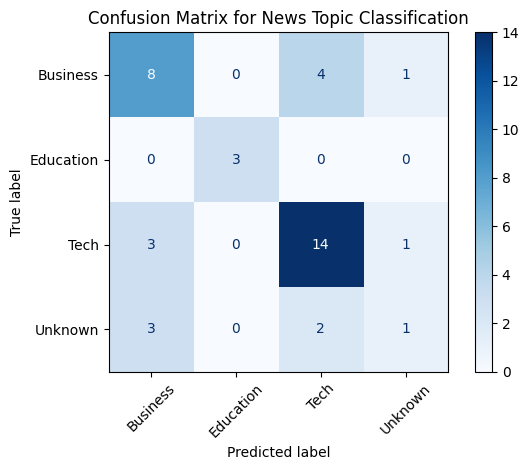

Classification Report:
               precision    recall  f1-score   support

    Business       0.57      0.62      0.59        13
   Education       1.00      1.00      1.00         3
        Tech       0.70      0.78      0.74        18
     Unknown       0.33      0.17      0.22         6

    accuracy                           0.65        40
   macro avg       0.65      0.64      0.64        40
weighted avg       0.63      0.65      0.63        40



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
labels = le.classes_
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix for News Topic Classification")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=labels)
print("Classification Report:\n", report)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("labeled_news_dataset.csv")

# Combine title and description into a single text field (lowercased)
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

# Split into training and testing sets (80/20 split, stratified by label)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Label'])

# Sample from training and testing sets for illustration
train_sample = train_df[['Title', 'Description', 'Label']].sample(5, random_state=1)
test_sample = test_df[['Title', 'Description', 'Label']].sample(5, random_state=1)

# Print training and testing set samples
print("Training Set Sample:")
print(train_sample.to_string(index=False))

print("\nTesting Set Sample:")
print(test_sample.to_string(index=False))


Training Set Sample:
                                                                                                                                                                              Title                                                                                                                                                                                                                                                          Description    Label
                                                                                                                                                                   1월 CPI, M6 비중 축소    Just In: January US PPI annual inflation rises 3.5%, above expectations for 3.2%.Core PPI inflation increased 3.6% Y/Y, compared to forecasts for a gain of 3.3%. pic.twitter.com/LZAIXP7MCb— Jesse Cohen (@JesseCohenInv) February 13, 2025 US Producer Prices …     Tech
                                                                               